In [3]:
from pathlib import Path
import sys
sys.path.append(str(Path("../../OBF").resolve()))


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from obf.utils.signal_visualization import show_signal

In [5]:
data_folder = Path("../data").resolve()
cols = ['ParticipantID','XAvg','YAvg','event','tSample']
gaze_df = pd.read_csv(Path(data_folder,Path("sample","EML1_003.csv")), usecols=cols)
y_df = pd.read_csv(Path(data_folder,"EML1_pageLevel.csv"))

In [6]:
y_df

,ParticipantID,Text,PageNum,datetime,unix_start,unix_end,readtime,MW,SVT,Rote_X,Inference_X,Deep_X,Rote_Y,Inference_Y,Rote_Z,Inference_Z,Deep_Z,Rote_D,Inference_D
0,EML1_001,Bias,1,NaN,NaN,NaN,34.830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1,EML1_001,Bias,2,NaN,NaN,NaN,14.257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EML1_001,Bias,3,NaN,NaN,NaN,33.862,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EML1_001,Bias,4,NaN,NaN,NaN,17.676,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
4,EML1_001,Bias,5,NaN,NaN,NaN,20.174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7972,EML1_138,Variables,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
7973,EML1_138,Variables,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
7974,EML1_138,CausalClaims,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
7975,EML1_138,CausalClaims,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [7]:
gaze_df[gaze_df['ParticipantID'] == "EML1_003"]
y_df[y_df['ParticipantID'] == "EML1_003"]

,ParticipantID,Text,PageNum,datetime,unix_start,unix_end,readtime,MW,SVT,Rote_X,Inference_X,Deep_X,Rote_Y,Inference_Y,Rote_Z,Inference_Z,Deep_Z,Rote_D,Inference_D
88,EML1_003,Bias,1,2020-06-16 14:27:42.529,1.592339e+09,1.592339e+09,98.227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
89,EML1_003,Bias,2,2020-06-16 14:29:20.759,1.592339e+09,1.592339e+09,28.158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,EML1_003,Bias,3,2020-06-16 14:29:48.917,1.592339e+09,1.592339e+09,65.599,0.0,1.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,EML1_003,Bias,4,2020-06-16 14:33:05.724,1.592340e+09,1.592340e+09,68.956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,EML1_003,Bias,5,2020-06-16 14:34:14.681,1.592340e+09,1.592340e+09,84.355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,EML1_003,Bias,6,2020-06-16 14:35:39.039,1.592340e+09,1.592340e+09,78.565,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,1.0
94,EML1_003,Bias,7,2020-06-16 14:36:57.605,1.592340e+09,1.592340e+09,72.204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
95,EML1_003,Bias,8,2020-06-16 14:38:09.809,1.592340e+09,1.592340e+09,70.518,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN
96,EML1_003,Bias,9,2020-06-16 14:39:20.329,1.592340e+09,1.592340e+09,59.082,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
97,EML1_003,Bias,10,2020-06-16 14:43:45.476,1.592340e+09,1.592340e+09,62.832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Create column to join on
def get_id(row):
    return f"{row['ParticipantID']}-{row['Text']}{str(row['PageNum']-1)}"
def get_event_page(row):
    return f"{row['Text']}{str(row['PageNum']-1)}"

y_df['id'] = y_df.apply(lambda row: get_id(row),axis=1)

In [14]:
y_df['event_page'] = y_df.apply(lambda row: get_event_page(row),axis=1)

In [15]:
def convert_to_sample_rate(df,current,target):
    step_size = round(current/target)
    num_rows=len(df)
    sampled_df = df.iloc[np.arange(0,num_rows,step=step_size)]
    return sampled_df

    

In [16]:
sampled_gaze_df = convert_to_sample_rate(gaze_df,1000,60)

In [17]:
def match_data(x_df,y_df,col='Rote_X'):
    filtered_y = y_df.loc[pd.notna(y_df[col])]
    full_df = filtered_y.merge(x_df,left_on=['ParticipantID','event_page'],right_on=['ParticipantID','event'],validate='one_to_many')
    return full_df

In [18]:
matched_df = match_data(sampled_gaze_df,y_df)

In [19]:
def get_time_signal(df):

    min_tsample_df = df.groupby('event').min('tSample').rename(columns={"tSample":"min_tSample"})
    min_tsample_df = min_tsample_df.filter(items=['event','min_tSample']).reset_index()
    res_df = df.merge(min_tsample_df,on='event')
    res_df['t'] = res_df['tSample'] - res_df['min_tSample']
    return res_df


In [20]:
res_df = get_time_signal(matched_df)

In [21]:
# Stats of setup
screen_res = (1920,1080)
screen_size = (525.78,297.18)
subject_dist = 989
screen_center = (screen_res[0]//2,screen_res[1]//2)

# Things they use
NA_FLAG = -180 # Flag for off screen gaze

In [22]:
import math
# They seem to only use the y_axis to compute the visual angle, but this seems like it could be a problem?
def get_pixels_per_degree(screen_res,screen_size,subject_dist):
    mm_per_pixel = screen_size[1] / screen_res[1]
    # x_pixels_per_degree = screen_res[0]/math.degrees(2*math.atan2(screen_size[0],(2*subject_dist)))
    # y_pixels_per_degree = screen_res[1]/math.degrees(2*math.atan2(screen_size[1],(2*subject_dist)))
    x_pixels_per_degree = screen_res[0]/math.degrees(2*np.arctan2(screen_size[0],(2*subject_dist)))
    y_pixels_per_degree = screen_res[1]/math.degrees(2*np.arctan2(screen_size[1],(2*subject_dist)))
    return x_pixels_per_degree,y_pixels_per_degree

def get_screen_limits(screen_res,pixels_per_deg):
    x_degrees = screen_res[0] / pixels_per_deg[0]
    y_degrees = screen_res[1] / pixels_per_deg[1]
    return x_degrees,y_degrees

def convert_to_angle(df,screen_center,pixel_degrees):
    data = df.copy()
    data['XAvg'] = (df['XAvg'] - screen_center[0]) / pixel_degrees[0]
    data['YAvg'] = (df['YAvg'] - screen_center[1]) / pixel_degrees[1]
    return data




In [23]:
x_pixels_per_deg, y_pixels_per_deg = get_pixels_per_degree(screen_res,screen_size,subject_dist)

In [24]:
x_pixels_per_deg,y_pixels_per_deg

(64.4910163456009, 63.19956134657273)

In [25]:
deg_lims = get_screen_limits(screen_res,(x_pixels_per_deg,y_pixels_per_deg))

In [26]:
deg_df = convert_to_angle(res_df,screen_center,get_pixels_per_degree(screen_res,screen_size,subject_dist))

In [27]:
def write_file_event(df,output_path):
    for event in df.event.unique():
        temp_df = df.loc[df['event']==event]  
        name = f'{temp_df["ParticipantID"].iloc[0]}-{event}.csv'
        temp_df.to_csv(Path(output_path, name),index=False)

def plot_data(df,event,t_lim=None,x_y_lim=None):
    temp_df = df.loc[df['event']==event]
    plt.plot(temp_df["t"], temp_df["XAvg"], label="x")
    plt.plot(temp_df["t"], temp_df["YAvg"], label="y")
    if t_lim:
        plt.xlim(t_lim)
    if x_y_lim:
        plt.ylim(x_y_lim)
    plt.legend()
    name = f'{temp_df["ParticipantID"].iloc[0]}-{event}.csv'
    plt.title(name)
    plt.show()    




In [28]:
deg_df.loc[deg_df['XAvg'].isna(),'XAvg'] = NA_FLAG
deg_df.loc[deg_df['YAvg'].isna(),'YAvg'] = NA_FLAG
signal = deg_df[['XAvg','YAvg']].to_numpy()

In [29]:
deg_lims

(29.771588490882394, 17.088726202979693)

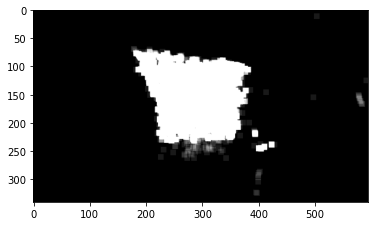

In [30]:
show_signal(signal,screen_width=deg_lims[0],screen_height=deg_lims[1])

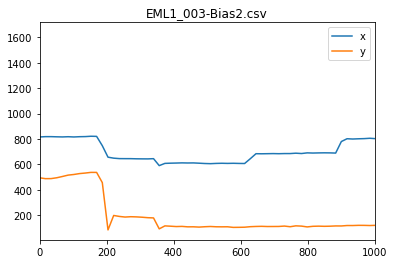

In [31]:
plot_data(res_df,"Bias2",t_lim=(0,1000))

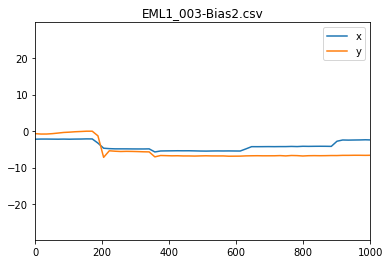

In [32]:
plot_data(deg_df,"Bias2",t_lim=(0,1000),x_y_lim=(-deg_lims[0],deg_lims[0]))

In [33]:
def preprocess_data(raw_data_path, output_folder, screen_res, target_frequency=60, current_frequency=1000,subject_dist=989,NA_FLAG=-180,debug=False):
    for file_path in raw_data_path.glob('*.csv'):
        df = pd.read_csv(file_path,usecols=['ParticipantID','XAvg','YAvg','event','tSample'])
        sampled_df = convert_to_sample_rate(df,current_frequency,target_frequency)
        pixels_per_deg = get_pixels_per_degree(screen_res,screen_size,subject_dist)
        sampled_df = convert_to_angle(sampled_df,(screen_res[0]//2,screen_res[1]//2),pixels_per_deg)
        # Set off screen gaze to NA_FLAG = -180 
        x_lim, y_lim = get_screen_limits(screen_res,pixels_per_deg)
        print(x_lim,y_lim)
        sampled_df.loc[sampled_df['XAvg'] < -x_lim, 'XAvg'] = NA_FLAG
        sampled_df.loc[sampled_df['XAvg'] > x_lim, 'XAvg'] = NA_FLAG
        sampled_df.loc[sampled_df['YAvg'] < -y_lim, 'YAvg'] = NA_FLAG
        sampled_df.loc[sampled_df['YAvg'] > y_lim, 'YAvg'] = NA_FLAG
        # Set null vals (blinks) to NA_FLAG = -180
        sampled_df.loc[sampled_df['XAvg'].isna(),'XAvg'] = NA_FLAG
        sampled_df.loc[sampled_df['YAvg'].isna(),'YAvg'] = NA_FLAG

        # Get time signal
        res_df = get_time_signal(sampled_df)

        # Select Columns needed
        res_df = res_df.filter(items=['ParticipantID','XAvg','YAvg','event','t'])

        if debug:
            for event in df.event.unique():
                plot_data(res_df,event,t_lim=(0,5000),x_y_lim=(-x_lim,x_lim))
        # Write files
        else:
            write_file_event(res_df,output_folder)


            
        return res_df
        

        


        

        


In [34]:
# Test
#preprocess_data(Path(data_folder,'samples'),'blah',screen_res=screen_res,debug=True)

In [35]:
# This runs whole data process
#preprocess_data(Path(data_folder,'samples'),Path(data_folder,"output"),screen_res=screen_res)

### Load data for training

In [46]:
import dask.dataframe as dd
import os
import random
import torch



In [47]:
class Dataset():
    def __getitem__(self,idx):
        raise NotImplementedError
    def __len__(self):
        raise NotImplementedError

        

In [48]:
df = dd.read_csv(os.path.join(Path(data_folder,"preprocessed/output"),"*.csv"))

In [49]:
df['id'] = df["ParticipantID"] + '-' + df['event']

In [50]:
def plot_sequence_length(folderpath,num=300):
    file_list = list(folderpath.resolve().glob("*.csv"))
    random_files = random.sample(file_list,num)
    sequence_lens = []
    for f in random_files:
        df = pd.read_csv(Path(folderpath,f).resolve())
        sequence_lens.append(len(df))
    plt.hist(sequence_lens,density=True,bins=30)
    plt.show()     
    return sequence_lens
        



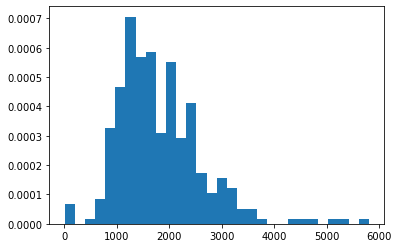

[2385,
 1710,
 3294,
 1745,
 2606,
 1605,
 2109,
 1847,
 1542,
 2358,
 1397,
 2702,
 3601,
 1,
 3120,
 2413,
 706,
 2515,
 2231,
 1120,
 917,
 2512,
 1223,
 874,
 2885,
 1548,
 1830,
 2181,
 943,
 5808,
 1309,
 1706,
 1358,
 1279,
 1872,
 2094,
 1611,
 3058,
 1642,
 2158,
 827,
 1109,
 1766,
 1675,
 181,
 3231,
 2098,
 2022,
 1621,
 1472,
 1930,
 1198,
 1147,
 884,
 1740,
 1619,
 1451,
 3766,
 2303,
 2420,
 1236,
 2054,
 1320,
 893,
 1152,
 1937,
 1239,
 1230,
 1511,
 2322,
 1888,
 1541,
 3575,
 3168,
 2489,
 1569,
 1306,
 1322,
 5159,
 1347,
 3302,
 5363,
 1221,
 1175,
 2604,
 2965,
 2631,
 1386,
 964,
 2319,
 1505,
 1339,
 2235,
 4427,
 3390,
 960,
 1296,
 986,
 1761,
 907,
 2931,
 2552,
 3002,
 1510,
 3291,
 1024,
 1716,
 1035,
 2443,
 949,
 488,
 2397,
 2255,
 1297,
 2019,
 1218,
 2113,
 1612,
 1973,
 1434,
 1088,
 1573,
 3147,
 4,
 2069,
 1636,
 2387,
 1908,
 890,
 1555,
 1219,
 1446,
 3036,
 1715,
 1648,
 2507,
 1951,
 1325,
 2101,
 1717,
 1052,
 2317,
 1125,
 1979,
 1771,
 2265,

In [54]:
plot_sequence_length((Path(data_folder,"preprocessed/output")))

### Dealing with class imbalance

Methods:
1. Stratified Kfold for training 
2. Up sample the minority class 
3. Weighted loss function
4. Precision-Recall vs ROCAUC vs F1-Score Metrics for evaluation

In [43]:
y_df.loc[y_df['Rote_X'].notnull()]['Rote_X'].value_counts()


1.0    1226
0.0     410
Name: Rote_X, dtype: int64

In [9]:
class MultiFileDataset(torch.utils.data.Dataset):
    def __init__(self, folder_name, file_list=[], file_mapper=None, file_type="csv", transform_x=None, transform_y=None, label_mapper=None):
        '''
        Dataset for large data with multiple csv files.

        Args:
        folder_name (str): path to folder where csv files are for x data
        file_list (list[str]): list of filenames to use for dataset
        file_mapper (fn): Gives list of files in folder to use for the dataset. Returns filename as string
        file_type (str): file extension. This is only used if file_mapper is none
        transform_x (list[fns]): functions that are applied to the x_data
        label_file (str): path to file specifying labels for each file
        label_mapper (fn): maps list of files to labels. Returns list
        '''

        self.folder_name = Path(folder_name)
        
        # If their is a list passed then use it, else if function then use it, else use all files in folder
        if file_list:
            self.files = file_list
        elif file_mapper:
            self.files = file_mapper(str(self.folder_name.resolve()))
        else:
            self.files = [str(f.resolve()) for f in self.folder_name.glob(f"*.{file_type}")]

        self.files = sorted(self.files)
        self.transform_x = transform_x
        self.transform_y = transform_y
        if label_mapper:
            self.labels = label_mapper(self.files)

        self.cached_data = {}
        print(len(self.files),len(self.labels))

    def __len__(self):
        return len(self.files)
    
    def _get_file_path(self,filename):
        return str(Path(self.folder_name,filename).resolve())
    
    def __getitem__(self,idx):
        filename = self.files[idx]
        if self.labels:
            label=self.labels[idx]
        if filename in self.cached_data:
            x_data = self.cached_data[filename]
        else:
            filepath = self._get_file_path(filename)
            # Assumes data has header row
            x_data = np.loadtxt(open(filepath,"rb"),delimiter=",",skiprows=1,usecols=[1,2])
            self.cached_data[filename] = x_data
        #print(x_data,label)
        if self.transform_x:
            for tr in self.transform_x:
                x_data = tr(x_data)
        if self.transform_y:
            for tr in self.transform_y:
                label = tr(label)
        #print(f"This is the label:{label}")
        if self.labels:
            return x_data, label
        else:
            return x_data




            


In [10]:
def label_files(label_df,id_col,label_col,filenames):
    # Strip extension
    ids = [f.split(".")[0] for f in filenames]
    #labels = label_df.loc[label_df[id_col].isin(ids)][label_col]
    labels = [label_df.loc[label_df[id_col] == id][label_col].values[0] for id in ids]
    return labels

def get_filenames_for_dataset(label_df,folder,id_col,label_col,ext="csv"):
    files = label_df.loc[pd.notna(label_df[label_col])][id_col].to_list()
    label_filenames = set([f"{file}.{ext}" for file in files])
    folder_filenames = set([f.name for f in folder.glob('*.csv')])
    return list(label_filenames.intersection(folder_filenames))

# Beware shuffles input
def random_split_train_test(filenames, percentage=0.8):
    random.shuffle(filenames)
    train_len = int(len(filenames) *0.8)
    return filenames[:train_len], filenames[train_len:]

# What is a good method for choosing the sequence length?
def limit_sequence_len(x_data,sequence_len=3000,random_part=True):
    if len(x_data) > sequence_len:
        # Remove part data
        if random_part:
            start_idx = random.randint(0,len(x_data) - sequence_len)
            x_data = x_data[start_idx:start_idx+sequence_len]

    else:
        # Pad data
        padded_data = np.zeros((sequence_len,2))
        padded_data[:len(x_data)] = x_data
        x_data = padded_data
    return x_data


In [64]:
Rote_X_filenames = get_filenames_for_dataset(y_df,Path("../data/preprocessed/output").resolve(),"id","Rote_X")    
train_filenames, test_filenames = random_split_train_test(Rote_X_filenames)

In [66]:
from functools import partial
label_map = partial(label_files,y_df,'id','Rote_X')

In [107]:
train = MultiFileDataset(str(Path("../data/preprocessed/output").resolve()),train_filenames,transform_x=[limit_sequence_len,lambda data: torch.tensor(data).float()],transform_y=[lambda data: torch.tensor(data).float()], label_mapper=label_map)
test = MultiFileDataset(str(Path("../data/preprocessed/output").resolve()),test_filenames,transform_x=[limit_sequence_len,lambda data: torch.tensor(data).float()],transform_y=[lambda data: torch.tensor(data).float()],label_mapper=label_map)

NameError: name 'train_filenames' is not defined

In [75]:
# Used to obtain sample weights for a list of classes. Helps to oversample minority classes
def get_sample_weights(targets):
    targets = np.array(targets,dtype=int)
    class_counts = np.unique(targets,return_counts=True)[1]
    weights = 1. / class_counts
    sample_weights = weights[targets]
    return sample_weights

In [78]:
training_sample_weights= get_sample_weights(train.labels)

In [79]:
weighted_sampler = torch.utils.data.sampler.WeightedRandomSampler(torch.from_numpy(training_sample_weights),len(training_sample_weights))

### Training Model

In [11]:
from obf.model import ae
from obf.model import creator

import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, confusion_matrix



In [54]:
# Directories
input_data_dir = str(Path("../data/output").resolve())
pre_train_dir = str(Path("../../OBF/pre_weights/sample_weights").resolve())
output_dir = str(Path("../results").resolve())


In [12]:
# Hyperparams
batch_size = 4
learning_rate = 0.001
epochs = 100
report_interval = 10
hidden_layers=[256,512]
use_cuda = torch.cuda.is_available()

In [13]:
# Tune the encoder if "tune" else "freeze" encoder and just train classifier
train_type = "freeze"

In [65]:
# Setup output
import datetime
from tensorboardX import SummaryWriter

time_str = datetime.datetime.now().strftime("%Y_%m_%d_%H.%M.%S")

checkpt_name = os.path.join(output_dir, time_str + ".txt")
log_dirname = os.path.join(output_dir, time_str + "_log")
model_save_path = os.path.join(log_dirname, "model.pt")


os.makedirs(log_dirname, exist_ok=True)


# Tensorboard writer
summary_writer = SummaryWriter(log_dir = log_dirname, flush_secs = 10)

In [181]:
# Create model
encoder = creator.load_encoder(pre_train_dir,use_cuda=use_cuda)
model = creator.create_classifier_from_encoder(encoder,hidden_layers=hidden_layers,n_output=1,dropout=0.5)
creator.print_models_info(["original encoder", "current model"], [encoder,model])

Loading:  /mnt/c/Users/rige3027/emotivelab/OBF/pre_weights/sample_weights/encoder_1633040995_gru.pt
ORIGINAL ENCODER ----------
There are Total Trainable 163358 parameters
Sequential(
  (0): CNNEncoder(
    (cnn): Sequential(
      (0): ConvBlock(
        (conv): Conv1d(2, 14, kernel_size=(7,), stride=(1,), padding=(3,))
        (pool_layer): AvgPool1d(kernel_size=(2,), stride=(2,), padding=(0,))
        (bn): BatchNorm1d(14, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activation): LeakyReLU(negative_slope=0.01)
      )
      (1): ConvBlock(
        (conv): Conv1d(16, 16, kernel_size=(7,), stride=(1,), padding=(3,))
        (bn): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activation): LeakyReLU(negative_slope=0.01)
      )
    )
  )
  (1): RNNEncoder(
    (rnn): GRU(32, 128, num_layers=2, batch_first=True, dropout=0.1)
  )
)
CURRENT MODEL ----------
There are Total Trainable 362783 parameters
Sequential(
  (0): 

In [182]:
# Data Loaders
train_dl = torch.utils.data.DataLoader(train,batch_size=batch_size,shuffle=True,drop_last=True)
test_dl = torch.utils.data.DataLoader(test,batch_size=batch_size,shuffle=False,drop_last=True)

In [14]:
report_interval = 1

In [40]:
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim
import termcolor
#from tqdm import tqdm
def run_model(mode, model, dataloader, writer, epoch_id, optimizer=None):
  # mode is either "train" or "test" or "valid"
  assert( epoch_id is not None )

  criterion = nn.BCEWithLogitsLoss()

  if mode == "train": 
    model = model.train( True )
  else:
    model.eval()
    
  epoch_losses = []
  
  reals = []
  preds = []
  probs = []
  for signal, label in dataloader:
    
    signal = signal.float()
    label = label.unsqueeze(1)
    #print(signal.shape, label.shape)
    #label = label.long().reshape(-1)
    # pdb.set_trace()
    if use_cuda:  
      signal = signal.cuda()
      label = label.cuda()

    # pdb.set_trace()

    if mode == "train": 
      optimizer.zero_grad()

      if signal.shape[0] < 2:
        continue # batch norm needs more than 1 sample
 
    # forward + backward + optimize
    outputs = model(signal)
    loss = criterion(outputs, label)
    epoch_losses.append(loss.item())

    reals += label.cpu().numpy().tolist()
    #preds += torch.argmax(outputs, dim=1).detach().cpu().numpy().tolist()
    probs.append(torch.sigmoid(outputs).detach())
    preds += (outputs.detach().cpu().numpy() > 0.0).astype(float).tolist()

    if mode == "train":
      loss.backward()
      optimizer.step()

  total_loss = np.nanmean(epoch_losses)
  acc = np.sum(np.array(reals) == np.array(preds)) / len(reals)
  
  probs = torch.cat(probs, dim=0)
  # print(f"Reals: {reals}")
  # print(f"Probs: {probs}")
  #top_5_acc = top_k_accuracy(probs.detach().cpu().numpy(), reals, k=5)
  #f1 = f1_score(reals, preds, average="weighted")
  try:
    auc = roc_auc_score(reals, probs, average="weighted")
    writer.add_scalar(mode + "/auc", auc, epoch_id)
  except ValueError as e:
    print(f"Epochid: {epoch_id}")

  
  writer.add_scalar(mode + "/loss", total_loss, epoch_id)
  writer.add_scalar(mode + "/acc", acc, epoch_id)
  #writer.add_scalar(mode + "/top_5_acc", top_5_acc, epoch_id)
  #writer.add_scalar(mode + "/f1", f1, epoch_id)
  writer.file_writer.flush()
  
  # print("#" * 50)
  if epoch_id % report_interval == 0 or epoch_id == epochs - 1:
    msg = "#" * 5 + "%s, Epoch: %d, Accuracy: %.2f, Loss: %.2f" % (mode, 
             epoch_id, acc, total_loss)

    if mode == "train":
      color = "red"
    elif mode == "valid":
      color = "yellow"
    else:
      color = "green"

    print(termcolor.colored(msg, color=color))
 
    # print("reals", reals, "preds", preds)
    # print(confusion_matrix(reals, preds))
  
  return acc

In [16]:
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

if train_type == "freeze":
  optimizer = optim.Adam(model[1:].parameters(), lr=learning_rate) # Freeze the Encoder
  print(termcolor.colored("We will FREEZE the encoder.", "blue"))
elif train_type == "tune":
  print(termcolor.colored("We will TUNE the WHOLE model.", "blue"))
else:
  raise "Unknown mode. It should be one of (tune, freeze, new)"  

NameError: name 'model' is not defined

In [18]:
import tqdm

def train_eval(epochs, model, train_dl, val_dl, summary_writer, optimizer,model_save_dir="./results/2022_02_15_17.20.57_log/", model_save_name="model.pt"):
  # %% Begin Training 
  train_accs = []
  valid_accs = []

  scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=max(1, int(epochs / 5)), gamma=0.5)
  for epoch in tqdm.tqdm(range(epochs)):
    acc = run_model("train", model, train_dl, summary_writer, epoch_id = epoch, optimizer=optimizer)
    summary_writer.add_scalar( "train/learning_rate", scheduler.get_last_lr()[-1], epoch )

    scheduler.step()
    if epoch % 5 == 0:
      torch.save(model, str(Path(model_save_dir, model_save_name).resolve()))

    with torch.no_grad():
      valid_acc = run_model("valid", model, val_dl, summary_writer, epoch_id=epoch)
      train_accs.append(acc)
      valid_accs.append(valid_acc)


  times = range(len(train_accs))
  plt.plot(times, train_accs, color="blue", label="train", alpha=0.5)
  plt.plot(times, valid_accs, color="green", label="valid", alpha=0.5)
  #plt.plot(times, test_accs, color="red", label="test", alpha=0.5)
  plt.legend()
  plt.show()
  return train_accs, valid_accs

In [44]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [45]:
%tensorboard --logdir ./results/2022_02_16_09.29.34_log

## Things to consider


### How do we fit something like this into common models framework? 
1. Can it handle lazy loading of data like the above dataset does?
2. How does it create the stratified datasets and run them?
3. What we really want is something that splits the dataset smartly just using the indices.


### Improving Model
1. Take steps to mitigate class imbalance
2. Test fine-tuning
3. Testing different hyperparameters (esp. learning rate might need a larger one when training classifier)
4. Since the sequence is quite long it is possible that a transformer encoder/decoder would perform better.

### Improving Training
1. Setup cloud training with cuda

## Sham No Sham

In [19]:
shamnosham_datapath = Path("./data/preprocessed/shamnosham_output")

In [20]:
seed = 66

In [21]:
def process_sham_data(folder, ext="csv"):
    l = []
    for f in folder.glob(f"*.{ext}"):
        l.append(pd.read_csv(f))
    df = pd.concat(l)
    df['sham'] = df['event'].apply(lambda x: "Sham" in x)
    df = df.drop(["t"],axis=1)
    df = df.groupby(['ParticipantID', 'event']).agg(lambda x: list(x))
    df = df.reset_index()
    #print(df.head())
    # Could set column to have type object:
    #df["scanpath"] = df.apply(lambda row: np.stack((np.array(row['XAvg']),np.array(row['YAvg'])),axis=1).astype(object),axis=1)
    #df["scanpath"] = df.apply(lambda row: [[row["XAvg"][i], row["YAvg"][i]] for i in range(len(row["XAvg"]))], axis=1)
    #df["scanpath"] = df["scanpath"].astype(object)
    df["sham"] = df["sham"].apply(lambda x: int(x[0]))
    #print(df.head())
    df = df.loc[df["sham"].notnull()]
    df = df.drop(['XAvg','YAvg'],axis=1)
    df["filename"] = df.apply(lambda row: f"{row['ParticipantID']}-{row['event']}.{ext}", axis=1)
    return df

In [22]:
# Generate CSV label file
sham_label_df = process_sham_data(shamnosham_datapath)

In [16]:
sham_label_df.to_csv("./data/sham_labels.csv")

In [23]:
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

#data = shuffle(sham_label_df,random_state=seed).reset_index(drop=True)
data = sham_label_df
enc = LabelEncoder()
groups = enc.fit_transform(data["ParticipantID"].values)
print(groups)
y = data["sham"]
gkf = StratifiedGroupKFold(4)
splits = gkf.split(data,y,groups=groups)

[  0   0   0 ... 142 142 142]


In [28]:
def sham_label_mapper(filenames):
    labels = []
    for f in filenames:
        if "sham" in f.split("/")[-1].lower():
            labels.append(1)
        else:
            labels.append(0)
    return labels


In [29]:
sham_dataset = MultiFileDataset(str(Path("../data/preprocessed/shamnosham_output").resolve()),transform_x=[limit_sequence_len,lambda data: torch.tensor(data).float()],transform_y=[lambda data: torch.tensor(data).float()], label_mapper=sham_label_mapper)

1346 1346


In [30]:
sham_dataset.files, sham_dataset.labels

(['./data/preprocessed/shamnosham_output/EML1_019-Bias0.csv',
  './data/preprocessed/shamnosham_output/EML1_019-Bias0_Sham.csv',
  './data/preprocessed/shamnosham_output/EML1_019-CausalClaims0.csv',
  './data/preprocessed/shamnosham_output/EML1_019-CausalClaims0_Sham.csv',
  './data/preprocessed/shamnosham_output/EML1_019-Hypotheses9.csv',
  './data/preprocessed/shamnosham_output/EML1_019-Hypotheses9_Sham.csv',
  './data/preprocessed/shamnosham_output/EML1_019-Validity9.csv',
  './data/preprocessed/shamnosham_output/EML1_019-Validity9_Sham.csv',
  './data/preprocessed/shamnosham_output/EML1_019-Variables0.csv',
  './data/preprocessed/shamnosham_output/EML1_019-Variables0_Sham.csv',
  './data/preprocessed/shamnosham_output/EML1_020-Bias9.csv',
  './data/preprocessed/shamnosham_output/EML1_020-Bias9_Sham.csv',
  './data/preprocessed/shamnosham_output/EML1_020-CausalClaims0.csv',
  './data/preprocessed/shamnosham_output/EML1_020-CausalClaims0_Sham.csv',
  './data/preprocessed/shamnosham_o

In [31]:
str(Path("../../OBF/pre_weights/sample_weights").resolve())

'/Users/rickgentry/emotive_lab/OBF/pre_weights/sample_weights'

In [42]:
def create_model(pre_train_dir='/Users/rickgentry/emotive_lab/OBF/pre_weights/sample_weights', hidden_layers=[256,512]):
    # Create model
    encoder = creator.load_encoder(pre_train_dir,use_cuda=use_cuda)
    model = creator.create_classifier_from_encoder(encoder,hidden_layers=hidden_layers,n_output=1,dropout=0.5)
    #creator.print_models_info(["original encoder", "current model"], [encoder,model])
    if use_cuda:
        model = model.cuda()
    return model
    

In [43]:
def create_optimizer(model, learning_rate=1e-3, train_type="freeze"):

    if train_type == "freeze":
        optimizer = optim.Adam(model[1:].parameters(), lr=learning_rate) # Freeze the Encoder
        print(termcolor.colored("We will FREEZE the encoder.", "blue"))
    elif train_type == "tune":
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
        print(termcolor.colored("We will TUNE the WHOLE model.", "blue"))
    else:
        raise "Unknown mode. It should be one of (tune, freeze, new)"  
    return optimizer

In [37]:
from tensorboardX import SummaryWriter
import datetime

def get_writer(output_dir):
    time_str = datetime.datetime.now().strftime("%Y_%m_%d_%H.%M.%S")

    checkpt_name = os.path.join(output_dir, time_str + ".txt")
    log_dirname = os.path.join(output_dir, time_str + "_log")
    #model_save_path = os.path.join(log_dirname, "model.pt")


    os.makedirs(log_dirname, exist_ok=True)


    # Tensorboard writer
    summary_writer = SummaryWriter(log_dir = log_dirname, flush_secs = 10)
    return summary_writer, log_dirname

In [39]:
from torch.utils.data import Subset, SubsetRandomSampler, DataLoader

def cross_validation(ds, splits,output_dir,epochs=8):
    all_train_accs = []
    all_val_accs = []
    summary_writer, results_dirname = get_writer(output_dir)
    for i, (train_split, val_split) in enumerate(splits):
        # train_ds = Subset(sham_dataset,train_split)
        # val_ds = Subset(sham_dataset,val_split)
        train_sampler = SubsetRandomSampler(train_split)
        train_dl = DataLoader(sham_dataset, batch_size=4, sampler=train_sampler)
        model = create_model()
        optimizer = create_optimizer(model)
        #summary_writer, results_dirname = get_writer(output_dir)
        val_sampler = SubsetRandomSampler(val_split)
        val_dl = DataLoader(sham_dataset, batch_size=4, sampler=val_sampler)
        train_accs, val_accs = train_eval(epochs,model,train_dl,val_dl,summary_writer,optimizer,model_save_dir=results_dirname,model_save_name=f"model{i}.pt")
        all_train_accs.append(train_accs)
        all_val_accs.append(val_accs)
    print(f"Mean Training Accuracy: {np.mean(np.array(all_train_accs))}")
    print(f"Mean Validation Accuracy: {np.mean(np.array(all_val_accs))}")
    return all_train_accs, all_val_accs

Loading:  /Users/rickgentry/emotive_lab/OBF/pre_weights/sample_weights/encoder_1633040995_gru.pt
We will FREEZE the encoder.


  0%|          | 0/8 [00:00<?, ?it/s]

#####train, Epoch: 0, Accuracy: 0.56, Loss: 0.70


 12%|█▎        | 1/8 [03:28<24:21, 208.84s/it]

#####valid, Epoch: 0, Accuracy: 0.65, Loss: 0.64
#####train, Epoch: 1, Accuracy: 0.58, Loss: 0.69


 25%|██▌       | 2/8 [06:35<19:33, 195.66s/it]

#####valid, Epoch: 1, Accuracy: 0.63, Loss: 0.63
#####train, Epoch: 2, Accuracy: 0.55, Loss: 0.71


 38%|███▊      | 3/8 [09:36<15:46, 189.22s/it]

#####valid, Epoch: 2, Accuracy: 0.71, Loss: 0.61
#####train, Epoch: 3, Accuracy: 0.60, Loss: 0.67


 50%|█████     | 4/8 [12:57<12:55, 193.84s/it]

#####valid, Epoch: 3, Accuracy: 0.72, Loss: 0.61
#####train, Epoch: 4, Accuracy: 0.59, Loss: 0.68


 62%|██████▎   | 5/8 [16:19<09:50, 196.74s/it]

#####valid, Epoch: 4, Accuracy: 0.73, Loss: 0.60
#####train, Epoch: 5, Accuracy: 0.61, Loss: 0.66


 75%|███████▌  | 6/8 [19:32<06:31, 195.52s/it]

#####valid, Epoch: 5, Accuracy: 0.71, Loss: 0.60
#####train, Epoch: 6, Accuracy: 0.60, Loss: 0.67


 88%|████████▊ | 7/8 [22:47<03:15, 195.34s/it]

#####valid, Epoch: 6, Accuracy: 0.70, Loss: 0.60
#####train, Epoch: 7, Accuracy: 0.58, Loss: 0.67


100%|██████████| 8/8 [25:55<00:00, 194.49s/it]

#####valid, Epoch: 7, Accuracy: 0.72, Loss: 0.59


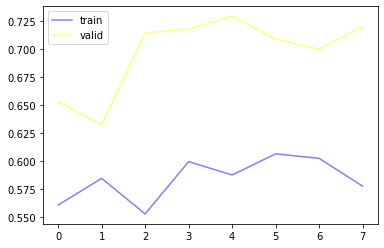

Loading:  /Users/rickgentry/emotive_lab/OBF/pre_weights/sample_weights/encoder_1633040995_gru.pt
We will FREEZE the encoder.


  0%|          | 0/8 [00:00<?, ?it/s]

#####train, Epoch: 0, Accuracy: 0.54, Loss: 0.72


 12%|█▎        | 1/8 [03:01<21:08, 181.19s/it]

#####valid, Epoch: 0, Accuracy: 0.64, Loss: 0.64
#####train, Epoch: 1, Accuracy: 0.59, Loss: 0.68


 25%|██▌       | 2/8 [06:04<18:13, 182.31s/it]

#####valid, Epoch: 1, Accuracy: 0.66, Loss: 0.62
#####train, Epoch: 2, Accuracy: 0.63, Loss: 0.66


 38%|███▊      | 3/8 [09:03<15:03, 180.77s/it]

#####valid, Epoch: 2, Accuracy: 0.65, Loss: 0.62
#####train, Epoch: 3, Accuracy: 0.59, Loss: 0.68


 50%|█████     | 4/8 [12:09<12:11, 182.99s/it]

#####valid, Epoch: 3, Accuracy: 0.68, Loss: 0.61
#####train, Epoch: 4, Accuracy: 0.62, Loss: 0.66


 62%|██████▎   | 5/8 [15:26<09:23, 187.91s/it]

#####valid, Epoch: 4, Accuracy: 0.67, Loss: 0.61
#####train, Epoch: 5, Accuracy: 0.59, Loss: 0.67


 75%|███████▌  | 6/8 [18:40<06:19, 189.92s/it]

#####valid, Epoch: 5, Accuracy: 0.65, Loss: 0.62
#####train, Epoch: 6, Accuracy: 0.61, Loss: 0.66


 88%|████████▊ | 7/8 [21:49<03:09, 189.68s/it]

#####valid, Epoch: 6, Accuracy: 0.66, Loss: 0.62
#####train, Epoch: 7, Accuracy: 0.63, Loss: 0.65


100%|██████████| 8/8 [24:57<00:00, 187.14s/it]

#####valid, Epoch: 7, Accuracy: 0.67, Loss: 0.61


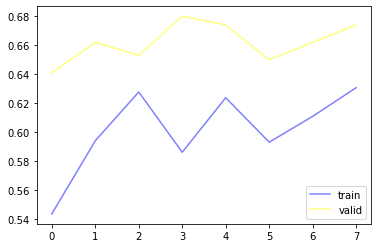

Mean Training Accuracy: 0.5924546593954062
Mean Validation Accuracy: 0.6793677351179994


In [41]:
output_dir = "./results"
train_accs, val_accs = cross_validation(sham_dataset, splits, output_dir)

In [42]:
df_to_split = pd.DataFrame()

In [43]:
df_to_split["ParticipantID"] = pd.Series([f.split["/"][-1].split["-"][0] for f in sham_dataset.files])

TypeError: 'builtin_function_or_method' object is not subscriptable

In [40]:
data['filename'].iloc[sl[0][0]]
#indx_to_files = {for f in data['filename']}

0             EML1_050-Variables0.csv
1       EML1_052-Hypotheses0_Sham.csv
2        EML1_027-Variables9_Sham.csv
3          EML1_038-CausalClaims0.csv
4       EML1_066-Hypotheses0_Sham.csv
                    ...              
1339     EML1_086-Variables0_Sham.csv
1340           EML1_132-Validity0.csv
1341     EML1_136-Variables9_Sham.csv
1342          EML1_025-Bias9_Sham.csv
1344           EML1_104-Validity9.csv
Name: filename, Length: 1009, dtype: object

In [18]:
sl = list(splits)
len(sl)

4

In [19]:
train_inds , test_inds = sl[0]

In [20]:
len(train_inds), len(test_inds)

(1009, 337)

In [21]:
train_inds

array([   0,    1,    2, ..., 1341, 1342, 1344])

In [23]:
data.iloc[train_inds].head()

,ParticipantID,event,sham,filename
0,EML1_050,Variables0,0,EML1_050-Variables0.csv
1,EML1_052,Hypotheses0_Sham,1,EML1_052-Hypotheses0_Sham.csv
2,EML1_027,Variables9_Sham,1,EML1_027-Variables9_Sham.csv
3,EML1_038,CausalClaims0,0,EML1_038-CausalClaims0.csv
4,EML1_066,Hypotheses0_Sham,1,EML1_066-Hypotheses0_Sham.csv


In [24]:
y.iloc[train_inds].head()

0    0
1    1
2    1
3    0
4    1
Name: sham, dtype: int64

In [102]:
model = create_model()

Loading:  /Users/rickgentry/emotive_lab/OBF/pre_weights/sample_weights/encoder_1633040995_gru.pt


In [103]:
load_model = torch.load("./results/2022_02_15_18.11.02_log/model0.pt")

In [104]:

with torch.no_grad():
    valid_acc = run_model("valid", model, val_dl, summary_writer, epoch_id=1)
    

Sequential(
  (0): Sequential(
    (0): CNNEncoder(
      (cnn): Sequential(
        (0): ConvBlock(
          (conv): Conv1d(2, 14, kernel_size=(7,), stride=(1,), padding=(3,))
          (pool_layer): AvgPool1d(kernel_size=(2,), stride=(2,), padding=(0,))
          (bn): BatchNorm1d(14, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (activation): LeakyReLU(negative_slope=0.01)
        )
        (1): ConvBlock(
          (conv): Conv1d(16, 16, kernel_size=(7,), stride=(1,), padding=(3,))
          (bn): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (activation): LeakyReLU(negative_slope=0.01)
        )
      )
    )
    (1): RNNEncoder(
      (rnn): GRU(32, 128, num_layers=2, batch_first=True, dropout=0.1)
    )
  )
  (1): MLP(
    (mlp): Sequential(
      (0): Linear(in_features=256, out_features=256, bias=True)
      (1): Sigmoid()
      (2): Dropout(p=0.5, inplace=False)
      (3): BatchNorm1d(256, eps=1e-05, mom